In [619]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import font_manager as font_manager
from scipy import interpolate

In [620]:
# Specify default fonts & graph sizes.
plt.rcParams["figure.figsize"] = (15,8.5)
font_dir = ['.../Data_Viz/Nunito']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
plt.rcParams['font.family'] = 'Nunito'
plt.rcParams.update({'font.size':12})

In [621]:
# Load the data for analysis.
road_crash_data = pd.read_csv("Road_Crashes.csv")

In [622]:
road_crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   13 non-null     object
 1   2020    13 non-null     int64 
 2   2019    13 non-null     int64 
 3   2018    13 non-null     int64 
 4   2017    13 non-null     int64 
 5   2016    13 non-null     int64 
 6   2015    13 non-null     int64 
 7   2014    13 non-null     int64 
 8   2013    13 non-null     int64 
 9   2012    13 non-null     int64 
 10  2011    13 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.2+ KB


In [623]:
# Count number of rows and get dataframe shape.
row_count = len(road_crash_data)
print(row_count)
print("Shape of the dataset: {}".format(road_crash_data.shape))

13
Shape of the dataset: (13, 11)


In [624]:
road_crash_data

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,January,1110,1138,1086,1068,1332,1500,1546,1498,1645,1945
1,February,1111,1040,1047,1013,1354,1581,1526,1413,1793,1694
2,March,974,1061,1099,1130,1251,1734,1654,1636,1815,1840
3,April,470,992,1013,1186,1205,1554,1507,1479,1656,1771
4,May,631,1103,1055,1220,1283,1588,1444,1585,1761,1793
5,June,782,976,1031,1046,1219,1523,1482,1350,1617,1971
6,July,922,1116,1123,1095,1149,1604,1569,1561,1735,1867
7,August,1026,1143,1086,1118,1303,1556,1664,1465,1690,1979
8,September,1270,1113,1068,1105,1162,1512,1509,1561,1567,1823
9,October,1328,1079,1001,1032,1105,1444,1452,1626,1564,1845


In [625]:
type(road_crash_data)

pandas.core.frame.DataFrame

In [626]:
road_crash_data.head(5)

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,January,1110,1138,1086,1068,1332,1500,1546,1498,1645,1945
1,February,1111,1040,1047,1013,1354,1581,1526,1413,1793,1694
2,March,974,1061,1099,1130,1251,1734,1654,1636,1815,1840
3,April,470,992,1013,1186,1205,1554,1507,1479,1656,1771
4,May,631,1103,1055,1220,1283,1588,1444,1585,1761,1793


In [627]:
road_crash_data.Month

0       January
1      February
2         March
3         April
4           May
5          June
6          July
7        August
8     September
9       October
10     November
11     December
12        Total
Name: Month, dtype: object

In [628]:
#Extract January figures from 2011 - 2020
January_data = road_crash_data[road_crash_data.Month == 'January']

In [629]:
January_data

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,January,1110,1138,1086,1068,1332,1500,1546,1498,1645,1945


In [630]:
#Extract February figures from 2011 - 2020
February_data = road_crash_data[road_crash_data.Month == 'February']

In [631]:
February_data

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
1,February,1111,1040,1047,1013,1354,1581,1526,1413,1793,1694


In [632]:
road_crash_data

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,January,1110,1138,1086,1068,1332,1500,1546,1498,1645,1945
1,February,1111,1040,1047,1013,1354,1581,1526,1413,1793,1694
2,March,974,1061,1099,1130,1251,1734,1654,1636,1815,1840
3,April,470,992,1013,1186,1205,1554,1507,1479,1656,1771
4,May,631,1103,1055,1220,1283,1588,1444,1585,1761,1793
5,June,782,976,1031,1046,1219,1523,1482,1350,1617,1971
6,July,922,1116,1123,1095,1149,1604,1569,1561,1735,1867
7,August,1026,1143,1086,1118,1303,1556,1664,1465,1690,1979
8,September,1270,1113,1068,1105,1162,1512,1509,1561,1567,1823
9,October,1328,1079,1001,1032,1105,1444,1452,1626,1564,1845


In [633]:
#Total number of Road Crashes per year from 2011 - 2020
Total_by_Year = road_crash_data[road_crash_data.Month == 'Total']

In [634]:
Total_by_Year

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
12,Total,12249,12858,12805,13244,14557,18495,18686,18368,19870,22272


In [635]:
road_crash_data = road_crash_data.drop(road_crash_data.index[12])

In [636]:
road_crash_data

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,January,1110,1138,1086,1068,1332,1500,1546,1498,1645,1945
1,February,1111,1040,1047,1013,1354,1581,1526,1413,1793,1694
2,March,974,1061,1099,1130,1251,1734,1654,1636,1815,1840
3,April,470,992,1013,1186,1205,1554,1507,1479,1656,1771
4,May,631,1103,1055,1220,1283,1588,1444,1585,1761,1793
5,June,782,976,1031,1046,1219,1523,1482,1350,1617,1971
6,July,922,1116,1123,1095,1149,1604,1569,1561,1735,1867
7,August,1026,1143,1086,1118,1303,1556,1664,1465,1690,1979
8,September,1270,1113,1068,1105,1162,1512,1509,1561,1567,1823
9,October,1328,1079,1001,1032,1105,1444,1452,1626,1564,1845


In [637]:
#Summary Statistics
road_crash_data.describe()

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
count,12.000000,12.0000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1020.750000,1071.5000,1067.083333,1103.666667,1213.083333,1541.250000,1557.166667,1530.666667,1655.833333,1856.000000
std,286.385667,60.4581,44.687721,65.772795,102.650739,82.351933,85.758470,99.229150,108.692923,88.812366
min,470.000000,976.0000,1001.000000,1013.000000,992.000000,1440.000000,1444.000000,1350.000000,1447.000000,1694.000000
25%,887.000000,1028.0000,1040.000000,1050.500000,1158.750000,1489.750000,1500.750000,1475.500000,1576.750000,1796.750000
50%,1068.000000,1091.0000,1061.500000,1100.000000,1212.000000,1538.500000,1536.000000,1529.500000,1650.500000,1842.500000
75%,1202.500000,1113.7500,1089.250000,1142.250000,1288.000000,1582.750000,1650.250000,1595.250000,1741.500000,1945.250000
max,1445.000000,1143.0000,1153.000000,1220.000000,1354.000000,1734.000000,1684.000000,1697.000000,1815.000000,1979.000000


In [638]:
road_crash_data_2020 = road_crash_data[['Month', '2020']]
road_crash_data_2019 = road_crash_data[['Month', '2019']]

In [639]:
road_crash_data_2020

,Month,2020
0,January,1110
1,February,1111
2,March,974
3,April,470
4,May,631
5,June,782
6,July,922
7,August,1026
8,September,1270
9,October,1328


In [640]:
x = road_crash_data_2020['Month']
y_2020 = road_crash_data_2020['2020']
y_2019 = road_crash_data_2019['2019']

In [641]:
type(x)

pandas.core.series.Series

In [642]:
#Convert the values in the Month Column to a list
x = x.tolist()

In [643]:
type(x)

list

In [644]:
x

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [645]:
# Extract Road crash monthly data for 2019 & 2020 as lists and consequently convert the figures to integers.
y_2020 = list(map(int, y_2020))
y_2019 = list(map(int, y_2019))

In [646]:
y_2020

[1110, 1111, 974, 470, 631, 782, 922, 1026, 1270, 1328, 1180, 1445]

In [647]:
y_2019

[1138, 1040, 1061, 992, 1103, 976, 1116, 1143, 1113, 1079, 984, 1113]

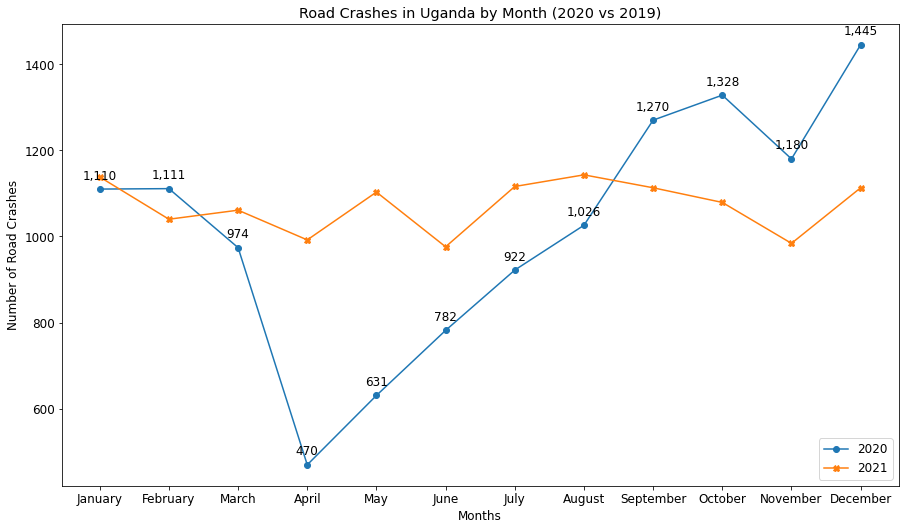

In [648]:
#Line Plot of Road Crash data by Month 
plt.plot(x,y_2020,marker='o')
plt.plot(x,y_2019,marker='X')
plt.title("Road Crashes in Uganda by Month (2020 vs 2019)")
plt.xlabel("Months")
plt.ylabel("Number of Road Crashes")
plt.legend(["2020","2021"], loc ="lower right")
#joins the x and y values
for x,y_2020 in zip(x,y_2020):

    label = "{:,}".format(y_2020)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y_2020), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 ha='center')
plt.show()

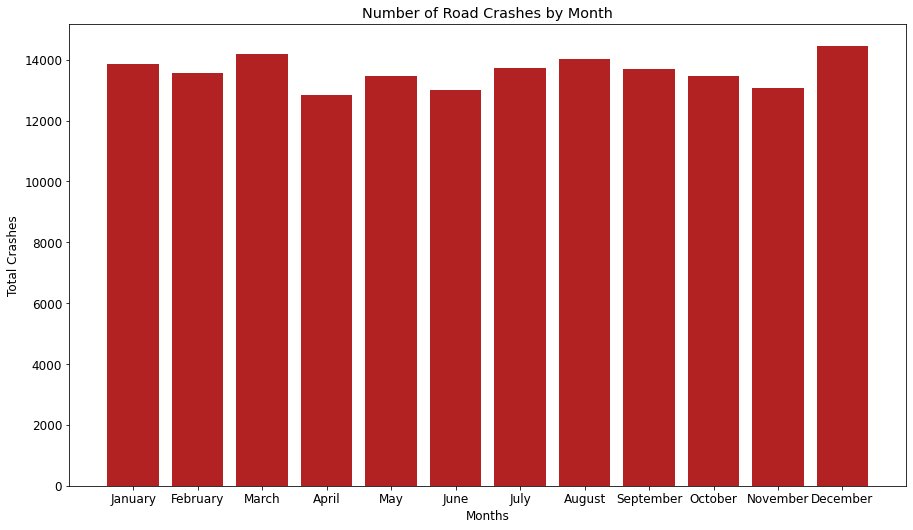

In [649]:
#Bar plot of Road Crash data by month
plt.bar(road_crash_data['Month'],road_crash_data.sum(axis=1),color='firebrick')
plt.xlabel("Months")
plt.ylabel("Total Crashes")
plt.title("Number of Road Crashes by Month")
plt.show()

In [650]:
Total_by_Year

,Month,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
12,Total,12249,12858,12805,13244,14557,18495,18686,18368,19870,22272


In [651]:
type(Total_by_Year)

pandas.core.frame.DataFrame

In [652]:
Total_by_Year = Total_by_Year.transpose()

In [653]:
Total_by_Year

,12
Month,Total
2020,12249
2019,12858
2018,12805
2017,13244
2016,14557
2015,18495
2014,18686
2013,18368
2012,19870


In [654]:
Total_by_Year.columns = Total_by_Year.iloc[0]

In [655]:
Total_by_Year

Month,Total
Month,Total
2020,12249
2019,12858
2018,12805
2017,13244
2016,14557
2015,18495
2014,18686
2013,18368
2012,19870


In [656]:
Total_by_Year = Total_by_Year.drop(Total_by_Year.index[0])

In [657]:
Total_by_Year

Month,Total
2020,12249
2019,12858
2018,12805
2017,13244
2016,14557
2015,18495
2014,18686
2013,18368
2012,19870
2011,22272


In [658]:
#adding an index to the dataframe
Total_by_Year = Total_by_Year.reset_index(level=0)

In [659]:
Total_by_Year

Month,index,Total
0,2020,12249
1,2019,12858
2,2018,12805
3,2017,13244
4,2016,14557
5,2015,18495
6,2014,18686
7,2013,18368
8,2012,19870
9,2011,22272


In [660]:
#Renaming the column names
Total_by_Year.columns = ['Year', 'Total Road Crashes']

In [661]:
Total_by_Year

,Year,Total Road Crashes
0,2020,12249
1,2019,12858
2,2018,12805
3,2017,13244
4,2016,14557
5,2015,18495
6,2014,18686
7,2013,18368
8,2012,19870
9,2011,22272


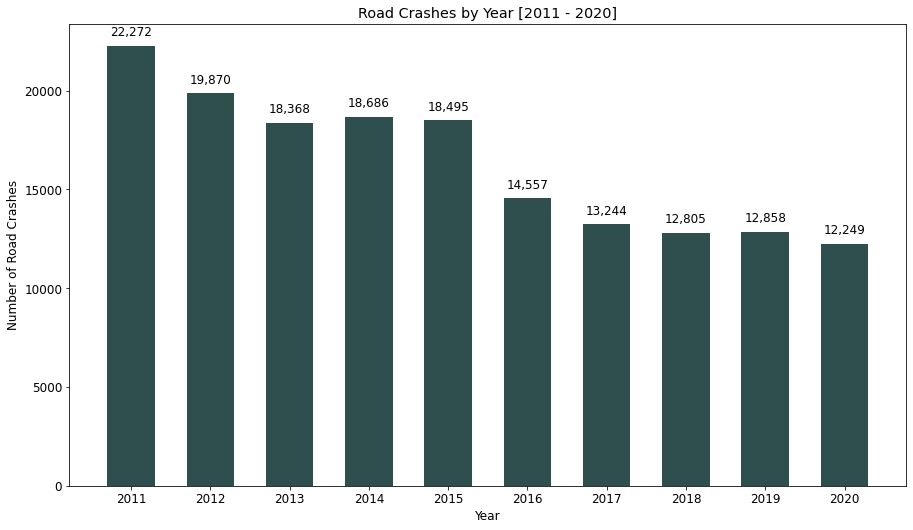

In [662]:
Total_by_Year = Total_by_Year.sort_values('Year')
x_year  = Total_by_Year['Year']
y_total = Total_by_Year['Total Road Crashes']
plt.bar(x_year,y_total,color='darkslategray', width=0.6)
plt.xlabel("Year")
plt.ylabel('Number of Road Crashes')
plt.title("Road Crashes by Year [2011 - 2020]")
for x,y in zip(x_year,y_total):

    label = "{:,}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()